In [435]:
from pyod.models.lscp import LSCP
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.manifold import TSNE

import pandas as pd
import scipy
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [436]:
mat = scipy.io.loadmat('ionosphere.mat')
df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))

In [437]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0.0
1,1.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1.0
2,1.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0.0
3,1.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1.0
4,1.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0.0


In [399]:
df.rename(columns={33:'label'}, inplace=True)
label = df['label']
dataset = df.iloc[:,:-1]

In [400]:
X_embedded = TSNE(n_components=2).fit_transform(dataset)

In [401]:
graph_df = pd.DataFrame(X_embedded, columns=['a','b'])
graph_df['label'] = label

In [402]:
graph_df.shape

(351, 3)

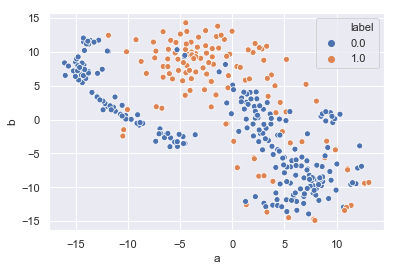

In [403]:
ax = sns.scatterplot(x="a", y="b", hue="label", data=graph_df)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                    label, 
                                                    test_size=0.4, 
                                                    random_state=42)

## LOF


On Training Data:
LOF ROC:0.8638, precision @ rank n:0.7123

On Test Data:
LOF ROC:0.9089, precision @ rank n:0.7736


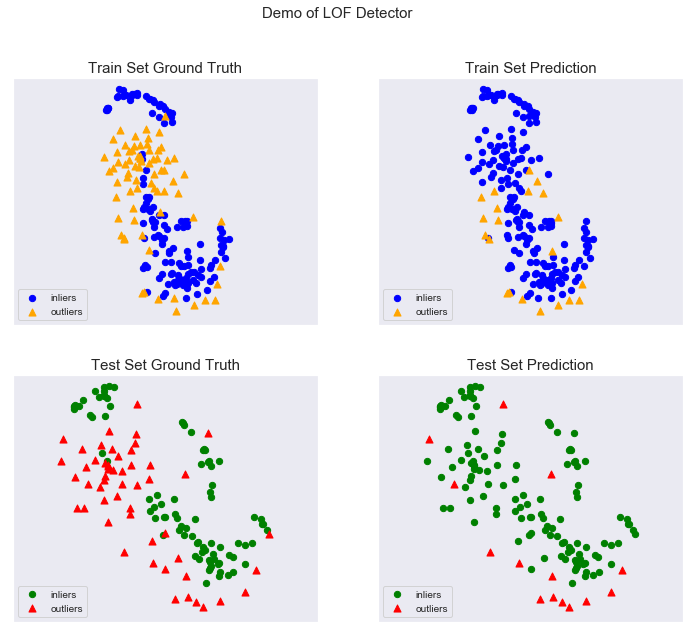

In [439]:
# train LOF detector
clf_name = 'LOF'
clf = LOF()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred_LOF = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_LOF = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores_LOF)

train_embedded = TSNE(n_components=2).fit_transform(X_train)
test_embedded = TSNE(n_components=2).fit_transform(X_test)


# visualize the results
visualize(clf_name, train_embedded, y_train, test_embedded, y_test, y_train_pred,
          y_test_pred_LOF, show_figure=True, save_figure=False)


### IFOREST

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)



On Training Data:
IForest ROC:0.8499, precision @ rank n:0.6438

On Test Data:
IForest ROC:0.8563, precision @ rank n:0.6792


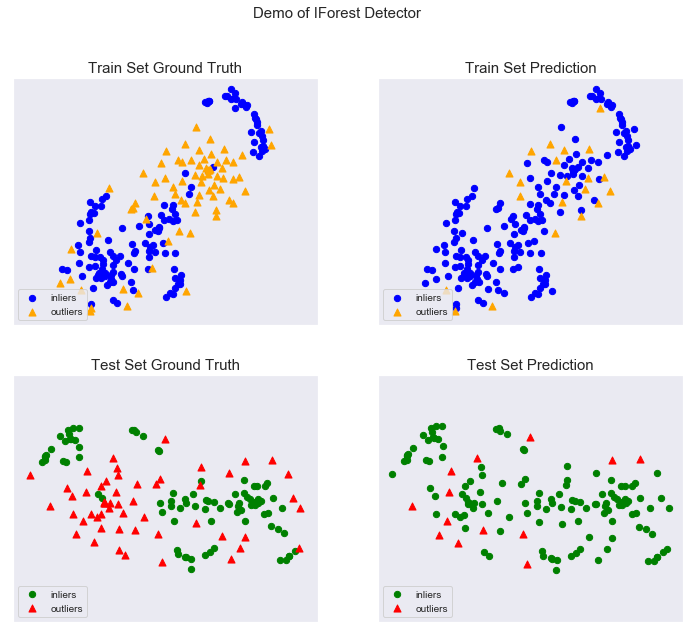

In [440]:
# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred_IF = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_IF = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores_IF)

train_embedded = TSNE(n_components=2).fit_transform(X_train)
test_embedded = TSNE(n_components=2).fit_transform(X_test)


# visualize the results
visualize(clf_name, train_embedded, y_train, test_embedded, y_test, y_train_pred,
          y_test_pred_IF, show_figure=True, save_figure=False)

## LSCP

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyod/models/lscp.py:376: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  "The number of histogram bins is greater than the number of "



On Training Data:
LSCP ROC:0.8614, precision @ rank n:0.726

On Test Data:
LSCP ROC:0.8825, precision @ rank n:0.7547


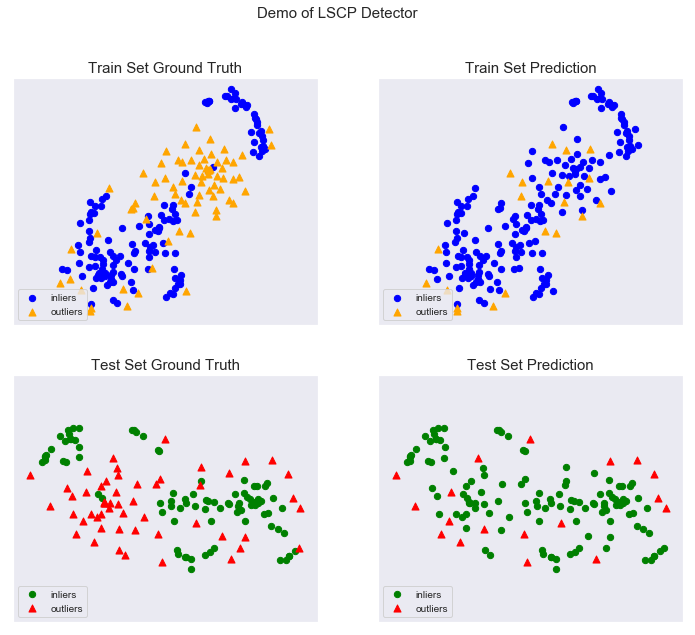

In [441]:
# train lscp
clf_name = 'LSCP'
detector_list = [LOF(), IForest()]
clf = LSCP(detector_list, random_state=42)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred_LSCP = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_LSCP = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")

evaluate_print(clf_name, y_test, y_test_scores_LSCP)

# visualize the results
visualize(clf_name, train_embedded, y_train, test_embedded, y_test, y_train_pred,
          y_test_pred_LSCP, show_figure=True, save_figure=False)

### Global outlier

In [364]:
mat = scipy.io.loadmat('pendigits.mat')
df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))

In [365]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.46977,1.000000,0.270463,0.812819,0.578246,0.371700,0.261600,0.000000,0.000000,0.234127,0.565463,0.533163,1.000000,0.901008,0.402439,0.982795,0.0
1,0.00000,0.887156,0.275891,1.000000,0.421130,0.758004,0.296085,0.449351,0.150966,0.150846,0.376991,0.000000,0.689886,0.019072,1.000000,0.057418,0.0
2,0.00000,0.568410,0.321768,0.682326,0.729609,0.903012,1.000000,1.000000,0.758613,0.752239,0.504585,0.505997,0.285181,0.255833,0.162748,0.000000,0.0
3,0.00000,1.000000,0.070717,0.918846,0.047145,0.686851,0.189419,0.457426,0.863797,0.345193,1.000000,0.456065,0.753983,0.231130,0.660028,0.000000,0.0
4,0.00000,0.671233,0.482427,0.826872,1.000000,1.000000,0.818488,0.802209,0.596662,0.603270,0.398628,0.403493,0.320968,0.200536,0.458526,0.000000,0.0


In [366]:
df.rename(columns={16:'label'}, inplace=True)
label = df['label']
dataset = df.iloc[:,:-1]

In [367]:
X_embedded = TSNE(n_components=2).fit_transform(dataset)
graph_df = pd.DataFrame(X_embedded, columns=['a','b'])
graph_df['label'] = label

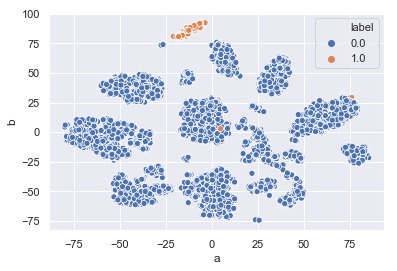

In [368]:
ax = sns.scatterplot(x="a", y="b", hue="label", data=graph_df)

### local outlier

In [369]:
mat = scipy.io.loadmat('letter.mat')
df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))

In [370]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6,10,5,6,3,10,6,4,6,14,...,0,8,14,6,6,0,10,2,7,0
1,0,6,0,4,0,7,7,4,4,7,...,0,7,13,6,8,0,8,1,7,0
2,4,7,5,5,3,7,8,2,7,7,...,1,7,7,6,8,0,8,2,8,0
3,1,6,1,4,2,7,7,0,7,7,...,1,8,7,6,8,0,8,3,8,0
4,1,2,1,3,1,7,7,1,7,7,...,1,8,7,6,9,0,8,3,8,0


In [371]:
df.rename(columns={32:'label'}, inplace=True)
label = df['label']
dataset = df.iloc[:,:-1]

In [372]:
X_embedded = TSNE(n_components=2).fit_transform(dataset)
graph_df = pd.DataFrame(X_embedded, columns=['a','b'])
graph_df['label'] = label

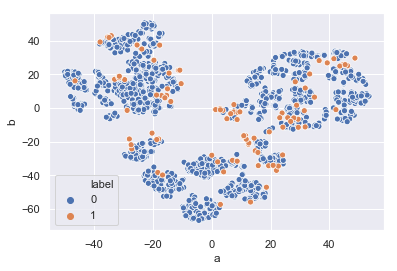

In [373]:
ax = sns.scatterplot(x="a", y="b", hue="label", data=graph_df)